<a href="https://colab.research.google.com/github/kshitizkool/Jupyter/blob/main/Sugercrane_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
 !pip install -q kaggle

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets download prabhakaransoundar/sugarcane-disease-dataset

100% 1.99G/2.00G [00:24<00:00, 82.2MB/s]
100% 2.00G/2.00G [00:24<00:00, 87.9MB/s]


In [9]:
! unzip sugarcane-disease-dataset

Archive:  sugarcane-disease-dataset.zip
  inflating: sugarcane RA/Bacterial Blight/S_BLB (1).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (10).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (100).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (11).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (12).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (13).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (14).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (15).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (16).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (17).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (18).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (19).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (2).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (20).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (21).JPG  
  inflating: sugarcane RA/Bacterial Blight/S_BLB (22).JPG  
 

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#Sharpening of images
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

#Preprocessing of Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Buliding Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [73]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Accuracy
from sklearn.metrics import classification_report

In [74]:
data_dir = '/content/sugarcane RA'
categories = os.listdir(data_dir)

In [75]:
categories=sorted(categories)
print(categories)

['Bacterial Blight', 'Healthy', 'Red Rot']


In [76]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2]

In [77]:
label_dict=dict(zip(categories, labels))
label_dict

{'Bacterial Blight': 0, 'Healthy': 1, 'Red Rot': 2}

In [78]:
data_list=[] #data_list- storing the images
labels_list=[] #label_list - storing the class labels

In [22]:
data1="/content/sugarcane RA/Healthy"
data2="/content/sugarcane RA/Red Rot"
data3="/content/sugarcane RA/Bacterial Blight"
count_healthy=0
count_redrot=0
count_bacterial=0


In [23]:
for i in os.listdir(data1):
        img_path=os.path.join(data1, i)
        count_healthy=count_healthy+1

In [24]:
for i in os.listdir(data2):
        img_path=os.path.join(data2, i)
        count_redrot=count_redrot+1

In [56]:
for i in os.listdir(data3):
        img_path=os.path.join(data3, i)
        count_bacterial=count_bacterial+1

In [57]:
count_healthy,count_redrot,count_bacterial

(100, 100, 100)

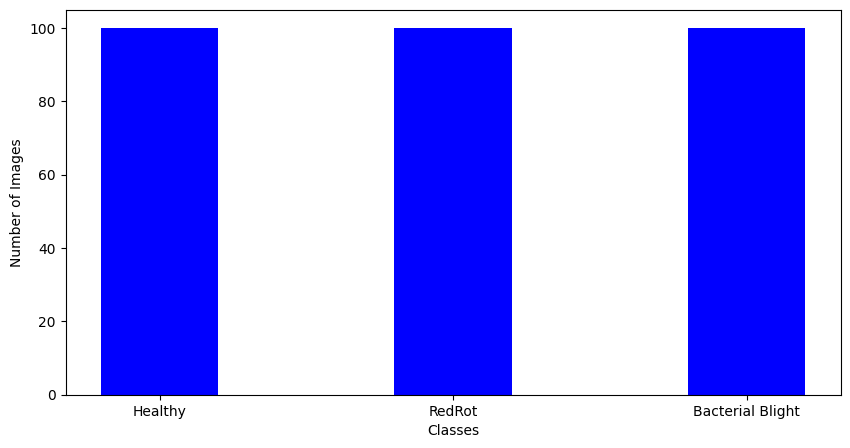

In [65]:
fig = plt.figure(figsize = (10, 5))
classes=["Healthy","RedRot", "Bacterial Blight"]
values=[count_healthy,count_redrot,count_bacterial]
plt.bar(classes, values, color ='blue',
        width = 0.4)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [66]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

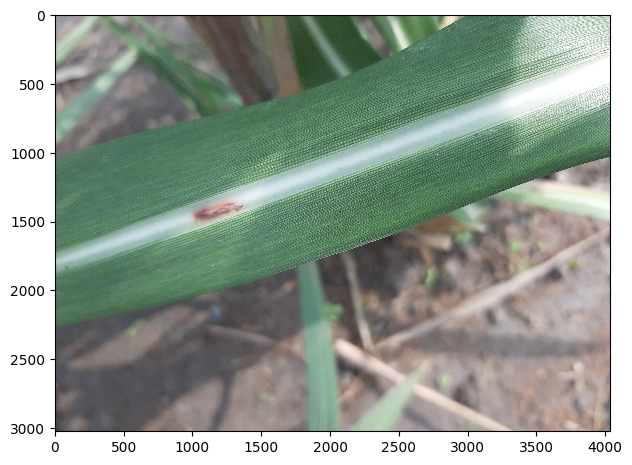

In [67]:
og_image = imread('/content/sugarcane RA/Red Rot/S_RR (1).jpg')
imshow(og_image);

In [68]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [69]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel,
                                     iterations)
    final_image = yuv2rgb(img_yuv)
    return final_image

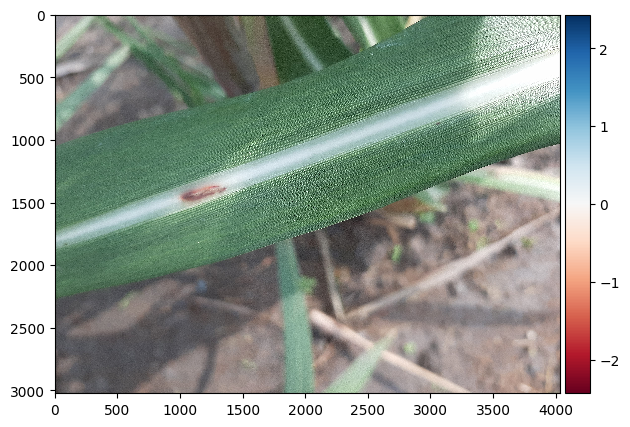

In [70]:
final_image = convolver_rgb(og_image, sharpen, iterations = 1)
imshow(final_image);

Image Preprocessing


1.   Resizing to 224,224
2.   Sharpening

In [79]:
from PIL import Image
for i in categories:
    folder_path=os.path.join(data_dir, i) #path to each disease folder
    img_names=os.listdir(folder_path)   #all images in each disease folder
    for img_name in img_names:
        img_path=os.path.join(folder_path, img_name)
        img = Image.open(img_path)
        img = img.resize((224,224))
        img = np.array(img)
        img = convolver_rgb(img, sharpen, iterations = 1)
        data_list.append(img)
        labels_list.append(label_dict[i])

In [80]:
data_list[0].shape

(224, 224, 3)

In [81]:
lb = LabelEncoder()
labels_list = lb.fit_transform(labels_list)
labels_list = to_categorical(labels_list)

In [82]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(300, 224, 224, 3)


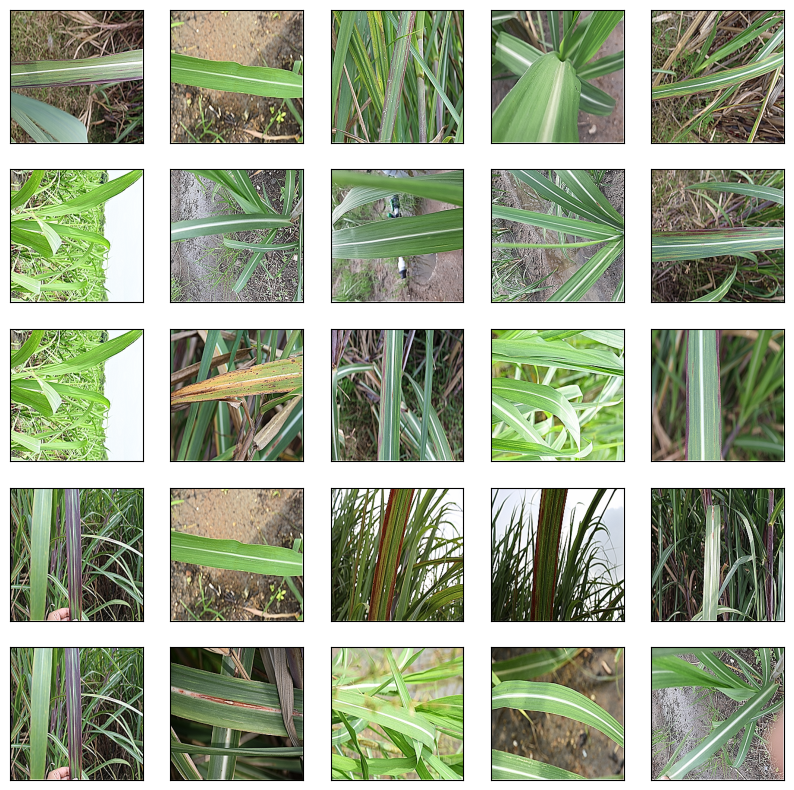

In [83]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(224)], cmap=plt.cm.binary)

plt.show()

# Image Augmentation

In [84]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

In [85]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [86]:
print( trainX.shape, testX.shape, trainY.shape, testY.shape)

(240, 224, 224, 3) (60, 224, 224, 3) (240, 3) (60, 3)


In [87]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout
from keras.layers import Input

In [99]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

base_model = ResNet50(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg")


In [100]:
from tensorflow.keras.regularizers import l2

In [101]:
base_model.trainable = False
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(3,kernel_regularizer=l2(0.01),activation="softmax")(x) #output layer
#kernel Regulariser- SVM

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="squared_hinge",metrics=["accuracy"])

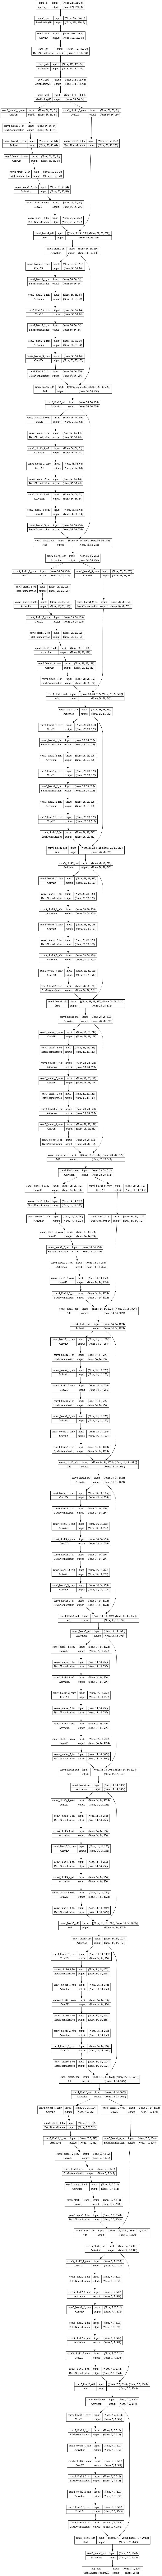

In [102]:
from tensorflow.keras.utils import plot_model
plot_model(base_model, to_file = 'Resnet50.png', show_shapes = True, show_layer_names = True)

In [103]:
BS=32
EPOCHS=10

In [93]:
history = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

Epoch 1/10
7/7 [==============================] - 134s 18s/step - loss: 1.3898 - accuracy: 0.3990 - val_loss: 1.2203 - val_accuracy: 0.5833
Epoch 2/10
7/7 [==============================] - 83s 12s/step - loss: 1.2298 - accuracy: 0.5865 - val_loss: 1.0731 - val_accuracy: 0.7833
Epoch 3/10
7/7 [==============================] - 84s 12s/step - loss: 1.1077 - accuracy: 0.7356 - val_loss: 0.9764 - val_accuracy: 0.8167
Epoch 4/10
7/7 [==============================] - 85s 12s/step - loss: 1.0404 - accuracy: 0.7644 - val_loss: 0.9421 - val_accuracy: 0.8333
Epoch 5/10
7/7 [==============================] - 86s 12s/step - loss: 0.9884 - accuracy: 0.7981 - val_loss: 0.9235 - val_accuracy: 0.8500
Epoch 6/10
7/7 [==============================] - 85s 12s/step - loss: 0.9596 - accuracy: 0.8173 - val_loss: 0.9094 - val_accuracy: 0.8833
Epoch 7/10
7/7 [==============================] - 84s 13s/step - loss: 0.9248 - accuracy: 0.8317 - val_loss: 0.8961 - val_accuracy: 0.8500
Epoch 8/10
7/7 [==========

In [94]:
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
2/2 [==============================] - 21s 7s/step
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        20
           1       0.95      0.95      0.95        20
           2       0.84      0.80      0.82        20

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



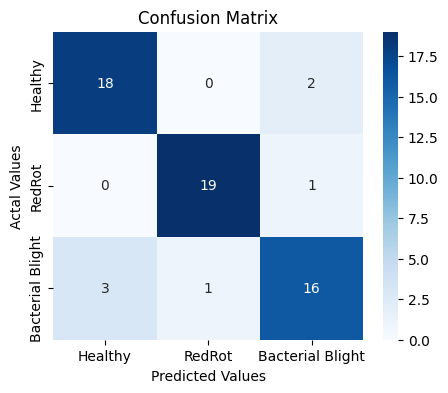

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)


cm_df = pd.DataFrame(cm,
                     index = ['Healthy','RedRot','Bacterial Blight'],
                     columns = ['Healthy','RedRot','Bacterial Blight'])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

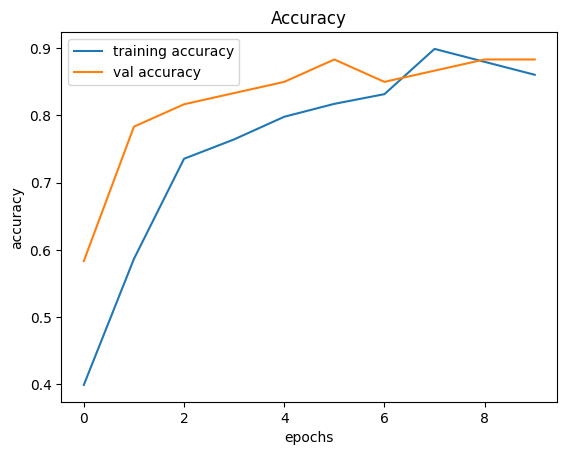

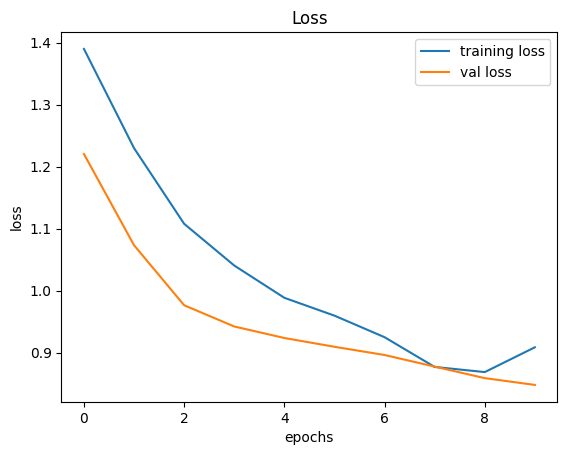

In [96]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()